<a href="https://colab.research.google.com/github/juanfisicobr/Fcomputacional/blob/main/Estrutura_cristalina_beta_FeSe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# instalando paquetes
! pip install pyscf
! pip install numpy
!pip3 install gpu4pyscf-cuda12x
!pip3 install cutensor-cu12

import numpy
import pyscf.lib
from pyscf.pbc import gto, scf


## Introduzindo uma célula
Parámetros de rede extraidos de
Greenfield, Joshua T.; Kamali, Saeed; Lee, Kathleen; Kovnir, Kirill
A Solution for Solution-Produced β-FeSe: Elucidating and Overcoming Factors that Prevent Superconductivity
Chemistry of Materials, 2015, 27, 588

---
O conjunto de bases 6-31G** de: A New Basis Set Exchange: An Open, Up-to-date Resource for the Molecular Sciences Community. Benjamin P. Pritchard, Doaa Altarawy, Brett Didier, Tara D. Gibson, Theresa L. Windus. J. Chem. Inf. Model. 2019, 59(11), 4814-4820, doi:10.1021/acs.jcim.9b00725.


In [ ]:
# Defina os parámetro de rede FeSe tetragonal

a = 3.7735 # Angstroms
c = 5.52230  # Angstroms
cell = gto.Cell()
cell.unit = 'AU' # unidade Angstrom
cell.a = [[  a,  0,  0], #Vetores primitivos
          [  0,  a,  0],
          [  0,  0,  c]]
cell.atom = '''Fe   0.00000    0.00000    0.00000
               Se     0.00000    1.88675    1.46483
              ''' # coordenadas cartecianas
# conjunto de bases
basis = {'Fe': gto.parse('''
#----------------------------------------------------------------------
# Basis Set Exchange
# Version 0.10
# https://www.basissetexchange.org
#----------------------------------------------------------------------
#   Basis set: 6-31G**
# Description: 6-31G + polarization on all atoms
#        Role: orbital
#     Version: 1  (Data from Gaussian 09/GAMESS)
#----------------------------------------------------------------------


BASIS "ao basis" CARTESIAN PRINT
#BASIS SET: (22s,16p,4d,1f) -> [5s,4p,2d,1f]
Fe    S
      0.6113262000E+05       0.1766110976E-02
      0.9179342000E+04       0.1353037982E-01
      0.2090857000E+04       0.6673127910E-01
      0.5892479000E+03       0.2314822969E+00
      0.1887543000E+03       0.4797057935E+00
      0.6444629000E+02       0.3501975953E+00
Fe    SP
      0.1259980000E+04       0.2438014027E-02       0.4028018665E-02
      0.2998761000E+03       0.3224048035E-01       0.3144646739E-01
      0.9684917000E+02       0.1265724014E+00       0.1368316886E+00
      0.3631020000E+02      -0.3139902035E-01       0.3487235710E+00
      0.1472996000E+02      -0.6207593068E+00       0.4617930616E+00
      0.6066075000E+01      -0.4502914050E+00       0.2043057830E+00
Fe    SP
      0.5043485000E+02      -0.3873255984E-02      -0.7017127880E-02
      0.1683929000E+02       0.7196597971E-01      -0.2877659951E-01
      0.7192086000E+01       0.2556590990E+00       0.6181382895E-01
      0.3053420000E+01      -0.2882836988E+00       0.3954945933E+00
      0.1273643000E+01      -0.7342821970E+00       0.4989058915E+00
      0.5040910000E+00      -0.2049352992E+00       0.1791250969E+00
Fe    SP
      0.1950316000E+01       0.5694869031E-01      -0.4593796163E+00
      0.7367210000E+00       0.2882915015E+00       0.2852139102E+00
      0.1141770000E+00      -0.1138159006E+01       0.9076485323E+00
Fe    SP
      0.4114800000E-01       0.1000000000E+01       0.1000000000E+01
Fe    D
      0.2314994000E+02       0.8876935479E-01
      0.6122368000E+01       0.3896319210E+00
      0.1846601000E+01       0.7014816379E+00
Fe    D
      0.5043610000E+00       1.0000000
Fe    F
      0.8000000000E+00       1.0000000


                                '''), 'Se': gto.parse('''#BASIS SET: (22s,16p,5d) -> [5s,4p,3d]
Se    S
      0.1070273000E+06       0.1722646000E-02
      0.1607076000E+05       0.1320324000E-01
      0.3661226000E+04       0.6520494000E-01
      0.1032673000E+04       0.2273787000E+00
      0.3313339000E+03       0.4771451000E+00
      0.1135470000E+03       0.3575553000E+00
Se    SP
      0.2313540000E+04       0.2261924000E-02       0.3818409000E-02
      0.5516849000E+03       0.3019493000E-01       0.3015145000E-01
      0.1794401000E+03       0.1258828000E+00       0.1325614000E+00
      0.6813044000E+02      -0.4373809000E-02       0.3443419000E+00
      0.2803062000E+02      -0.6043277000E+00       0.4639237000E+00
      0.1166572000E+02      -0.4861200000E+00       0.2068198000E+00
Se    SP
      0.1015754000E+03      -0.5752618000E-02      -0.6942389000E-02
      0.3561545000E+02       0.5675608000E-01      -0.3014441000E-01
      0.1513135000E+02       0.2651243000E+00       0.4776411000E-01
      0.6646923000E+01      -0.1670582000E+00       0.3663827000E+00
      0.2972805000E+01      -0.7188737000E+00       0.4940086000E+00
      0.1316707000E+01      -0.3221907000E+00       0.2100109000E+00
Se    SP
      0.1846991000E+01       0.2823156000E+00      -0.2653920000E-01
      0.6471590000E+00      -0.2129616000E+00       0.3357291000E+00
      0.2579870000E+00      -0.9545384000E+00       0.7301815000E+00
Se    SP
      0.9410700000E-01       0.1000000000E+01       0.1000000000E+01
Se    D
      0.5618544000E+02       0.7904963000E-01
      0.1554808000E+02       0.3746449000E+00
      0.4989394000E+01       0.7071645000E+00
Se    D
      0.1523844000E+01       1.0000000
Se    D
      0.3810000000E+00       1.0000000

''')},
ecp = {'Fe': 'bfd-pp'},
pseudo = {'Se': 'gthbp'}
cell.exp_to_discard=0.1 #para remover os Gaussianos difusos cujos expoentes são menores que 0,1.
cell.build()


A biblioteca ase (Atomic Simulation Environment) consegue converter entre vários formatos de arquivos de estrutura ou gravar a geometria do cristal.
Podem ser lidos pelo VESTA, Avogadro, etc.

In [ ]:
pip install ase

In [ ]:
from ase.io import write
from ase import Atoms

# Obtem os símbolos dos átomos
atom_symbols = [cell.atom_symbol(i) for i in range(cell.natm)]

# Converta o objeto Cell do PySCF para um objeto Atoms da ase
atoms = Atoms(symbols=atom_symbols,
              positions=cell.atom_coords(),
              cell=cell.lattice_vectors(),
              pbc=True)  # Define condições periódicas de contorno

# Salve o objeto Atoms como arquivo .vasp
write('FeSe.vasp', atoms, format='vasp', vasp5=True, direct=True)

In [ ]:
with open('FeSe.xyz', 'w') as f:
    # Escreva o número de átomos na primeira linha
    f.write(str(cell.natm) + '\n')
    # Escreva um comentário na segunda linha (opcional)
    f.write('Estrutura gerada com PySCF\n')
    # Escreva as coordenadas de cada átomo
    for i in range(cell.natm):
        símbolo = cell.atom_symbol(i)
        x, y, z = cell.atom_coord(i)
        f.write(f'{símbolo} {x} {y} {z}\n')

# Cálculo SCF:


In [ ]:
# Calcula a estrutura eletrônica com HF (Ondas Planas e Aprocimação Gaussiana MDF)
import gpu4pyscf #comente se não tiver GPU
nk = [4,4,4]  # 4 k-points por cada eixo, 4^3=64 kpts em total. Pontos k no espaço recíproco, que são usados para realizar integrações na primeira zona de Brillouin para determinar as propriedades dos materiais.
kpts = cell.make_kpts(nk)
kmf = scf.KRHF(cell, kpts).mix_density_fit()
kmf = scf.addons.smearing_(kmf, sigma=0.01, method='fermi').run()
print('Entropy = %s' % kmf.entropy)
print('Free energy = %s' % kmf.e_free)
print('Zero temperature energy = %s' % ((kmf.e_tot+kmf.e_free)/2))
kmf.kernel()


WARN: memory usage of outcore_auxe2 may be 2.33 times over max_memory

converged SCF energy = -3618.797862882
Entropy = 0.07440535962913279
Free energy = -3618.7986069355934
Zero temperature energy = -3618.798234908795
converged SCF energy = -3618.79786288036


-3618.7978628803558

/usr/local/lib/python3.11/dist-packages/ase/dft/kpoints.py:405: UserWarning: Please do not use (kpts, x, X) = bandpath(...).  Use path = bandpath(...) and then kpts = path.kpts and (x, X, labels) = path.get_linear_kpoint_axis().
  warnings.warn('Please do not use (kpts, x, X) = bandpath(...).  '


converged SCF energy = -3618.79786288156
-3618.797862881561

WARN: DF integrals for band k-points were not found /tmp/tmp08bpuso1. DF integrals will be rebuilt to include band k-points.


WARN: File /tmp/tmp08bpuso1 (specified by ._cderi) is overwritten by GDF initialization.


WARN: memory usage of outcore_auxe2 may be 8.44 times over max_memory



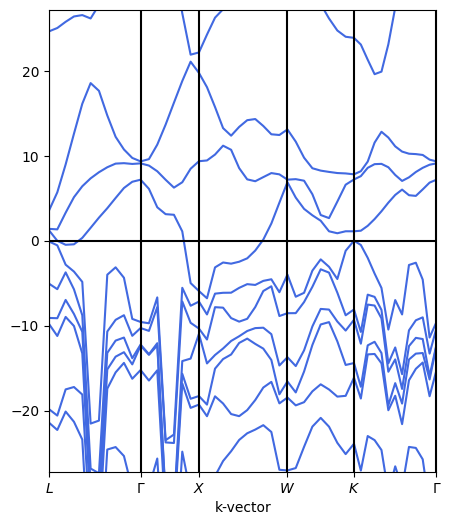

In [ ]:
import pyscf.pbc.tools.pyscf_ase as pyscf_ase
import pyscf.pbc.gto as pbcgto
import pyscf.pbc.dft as pbcdft

import matplotlib.pyplot as plt

from ase.build import bulk
from ase.dft.kpoints import sc_special_points as special_points, get_bandpath


points = special_points['tetragonal']
G = points['G']
X = points['X']
W = [0.5, 0.25, 0.75]
K = points['M']
L = [0.5, 0.5, 0.5]
band_kpts, kpath, sp_points = get_bandpath([L, G, X, W, K, G], [[  3.7735 ,  0,  0],
          [  0,  3.7735 ,  0],
          [  0,  0,  5.52230]], npoints=50)
band_kpts = cell.get_abs_kpts(band_kpts)


print(kmf.kernel())

e_kn_2 = kmf.get_bands(band_kpts)[0]
vbmax = -99
for en in e_kn_2:
    vb_k = en[cell.nelectron//2-1]
    if vb_k > vbmax:
        vbmax = vb_k
e_kn_2 = [en - vbmax for en in e_kn_2]

au2ev = 27.21139 # o equivalente a 1 Hartre em eV

emin = -1*au2ev
emax = 1*au2ev

plt.figure(figsize=(5, 6))
nbands = cell.nao_nr()
for n in range(nbands):
    plt.plot(kpath, [e[n]*au2ev for e in e_kn_2], color='#4169E1')
for p in sp_points:
    plt.plot([p, p], [emin, emax], 'k-')
plt.plot([0, sp_points[-1]], [0, 0], 'k-')
plt.xticks(sp_points, ['$%s$' % n for n in ['L', r'\Gamma', 'X', 'W', 'K', r'\Gamma']])
plt.axis(xmin=0, xmax=sp_points[-1], ymin=emin, ymax=emax)
plt.xlabel('k-vector')

plt.show()

In [ ]:
# Calcula a estrutura eletrônica com DFT (LDA, por Ondas Planas e Aprocimação Gaussiana MDF)
from pyscf.pbc import dft
import gpu4pyscf #comente se não tiver GPU
nk = [4,4,4]  # 4 k-points por cada eixo, 4^3=64 kpts em total. Pontos k no espaço recíproco, que são usados para realizar integrações na primeira zona de Brillouin para determinar as propriedades dos materiais.
kpts = cell.make_kpts(nk)
kmf = dft.KRKS(cell, kpts).mix_density_fit()
kmf = scf.addons.smearing_(kmf, sigma=0.01, method='fermi').run()
print('Entropia = %s' % kmf.entropy)
print('Energia livre = %s' % kmf.e_free)
print('Energia do zero absoluto = %s' % ((kmf.e_tot+kmf.e_free)/2))
kmf.xc = 'lda,vwn'
kmf.kernel()

<class 'pyscf.pbc.df.mdf.MDF'> does not have attributes  time_reversal_symmetry


converged SCF energy = -3615.81203539014
Entropy = 0.6911134198007105
Free energy = -3615.8189465243368
Zero temperature energy = -3615.8154909572377
converged SCF energy = -3615.81203539014


-3615.812035390139

Plotar a estrutura de bandas:

/usr/local/lib/python3.11/dist-packages/ase/dft/kpoints.py:405: UserWarning: Please do not use (kpts, x, X) = bandpath(...).  Use path = bandpath(...) and then kpts = path.kpts and (x, X, labels) = path.get_linear_kpoint_axis().
  warnings.warn('Please do not use (kpts, x, X) = bandpath(...).  '


converged SCF energy = -3615.81203539014
-3615.8120353901368

WARN: DF integrals for band k-points were not found /tmp/tmpn5ung115. DF integrals will be rebuilt to include band k-points.


WARN: File /tmp/tmpn5ung115 (specified by ._cderi) is overwritten by GDF initialization.



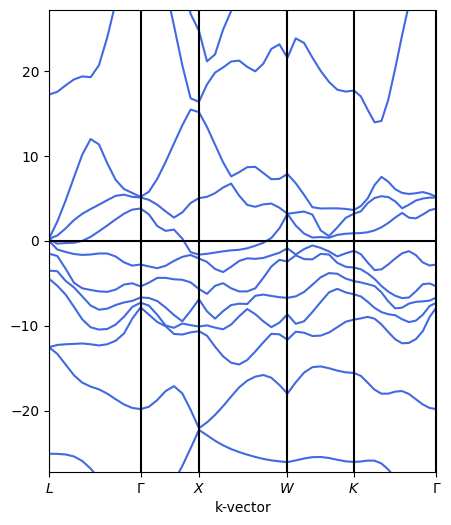

In [ ]:
import pyscf.pbc.tools.pyscf_ase as pyscf_ase
import pyscf.pbc.gto as pbcgto
import pyscf.pbc.dft as pbcdft

import matplotlib.pyplot as plt

from ase.build import bulk
from ase.dft.kpoints import sc_special_points as special_points, get_bandpath


points = special_points['tetragonal']
G = points['G']
X = points['X']
W = [0.5, 0.25, 0.75]
K = points['M']
L = [0.5, 0.5, 0.5]
band_kpts, kpath, sp_points = get_bandpath([L, G, X, W, K, G], [[  3.7735 ,  0,  0],
          [  0,  3.7735 ,  0],
          [  0,  0,  5.52230]], npoints=50)
band_kpts = cell.get_abs_kpts(band_kpts)


print(kmf.kernel())

e_kn_2 = kmf.get_bands(band_kpts)[0]
vbmax = -99
for en in e_kn_2:
    vb_k = en[cell.nelectron//2-1]
    if vb_k > vbmax:
        vbmax = vb_k
e_kn_2 = [en - vbmax for en in e_kn_2]

au2ev = 27.21139

emin = -1*au2ev
emax = 1*au2ev

plt.figure(figsize=(5, 6))
nbands = cell.nao_nr()
for n in range(nbands):
    plt.plot(kpath, [e[n]*au2ev for e in e_kn_2], color='#4169E1')
for p in sp_points:
    plt.plot([p, p], [emin, emax], 'k-')
plt.plot([0, sp_points[-1]], [0, 0], 'k-')
plt.xticks(sp_points, ['$%s$' % n for n in ['L', r'\Gamma', 'X', 'W', 'K', r'\Gamma']])
plt.axis(xmin=0, xmax=sp_points[-1], ymin=emin, ymax=emax)
plt.xlabel('k-vector')

plt.show()